In [169]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [170]:
!ls

#dis_nojump.xvg.1#           start.gro
Gromacs_Analysis.ipynb       water_NaCl.tpr
MyAnalysis.ipynb             water_NaCl.xtc
Utilities_file_reading.ipynb water_NaCl_mol.xtc
article.pdf                  water_NaCl_nojump.xtc
dis_mol.xvg                  water_nacl_traj_nopbc.gro
dis_nojump.xvg


In [171]:
u_raw = mda.Universe('water_nacl_traj_nopbc.gro', 'water_NaCl.xtc')
u_mol = mda.Universe('water_nacl_traj_nopbc.gro', 'water_NaCl_mol.xtc')
u_nojump = mda.Universe('water_nacl_traj_nopbc.gro', 'water_NaCl_nojump.xtc')

In [172]:
def dist(x1, x2):
    """
    Same as '-pbc no' option in gmx distance or gmx mindist.
    
    """
    x = x1 - x2
    d = np.linalg.norm(x)
    return d

def dist_mic(x1, x2, box_lengths):
    """
    Same as 'Default :: -pbc yes' option in gmx distance or gmx mindist.
    https://scicomp.stackexchange.com/questions/3107/minimum-image-convention-for-triclinic-unit-cell
    
    """
    delta = x1 - x2
    
    delta_x = delta[0]
    delta_y = delta[1]
    delta_z = delta[2]

    delta_x -= (round(delta_x/box_lengths[0])) * box_lengths[0]
    delta_y -= (round(delta_y/box_lengths[1])) * box_lengths[1]
    delta_z -= (round(delta_z/box_lengths[2])) * box_lengths[2]

    d = np.linalg.norm([delta_x, delta_y, delta_z])

    
    return d

In [173]:
x_raw, x_mol, x_nojump = [], [], []
l = []
d1_raw, d1_mol, d1_nojump = [], [], []
d2_raw, d2_mol, d2_nojump = [], [], []

# raw
for ts in u_raw.trajectory:
    x_raw.append(u_raw.select_atoms('resname NA').positions[0, 2]/10)
    l.append(u_raw.dimensions[2]/10)

    pos1 = u_raw.select_atoms('resname NA').positions[0]/10
    pos2 = u_raw.select_atoms('resname CL').positions[0]/10

    d1_raw.append(dist(pos1, pos2))
    d2_raw.append(dist_mic(pos1, pos2, u_raw.dimensions[:3]/10))

# -pbc mol
for ts in u_mol.trajectory:
    x_mol.append(u_mol.select_atoms('resname NA').positions[0, 2]/10)

    pos1 = u_mol.select_atoms('resname NA').positions[0]/10
    pos2 = u_mol.select_atoms('resname CL').positions[0]/10

    d1_mol.append(dist(pos1, pos2))
    d2_mol.append(dist_mic(pos1, pos2, u_mol.dimensions[:3]/10))

# -pbc nojump
for ts in u_nojump.trajectory:
    x_nojump.append(u_nojump.select_atoms('resname NA').positions[0, 2]/10)

    pos1 = u_nojump.select_atoms('resname NA').positions[0]/10
    pos2 = u_nojump.select_atoms('resname CL').positions[0]/10

    d1_nojump.append(dist(pos1, pos2))
    d2_nojump.append(dist_mic(pos1, pos2, u_nojump.dimensions[:3]/10))
    

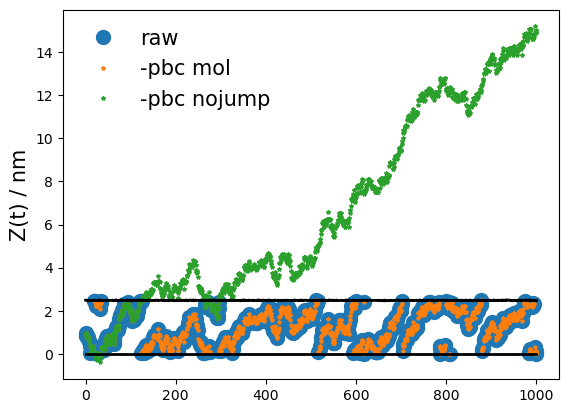

In [174]:
plt.plot(x_raw, 'o', ms=10, label='raw')
plt.plot(x_mol, '*', ms=3, label='-pbc mol')
plt.plot(x_nojump, '*', ms=3, label='-pbc nojump')
plt.plot(l, c='black', linewidth=2.0)
plt.plot(np.zeros(len(u_raw.trajectory)), c='black', linewidth=2.0)
plt.ylabel('Z(t) / nm', fontsize=15)
plt.legend(frameon=False, fontsize=15)

Text(100, 2.3, 'Minimum image \nconvention is used')

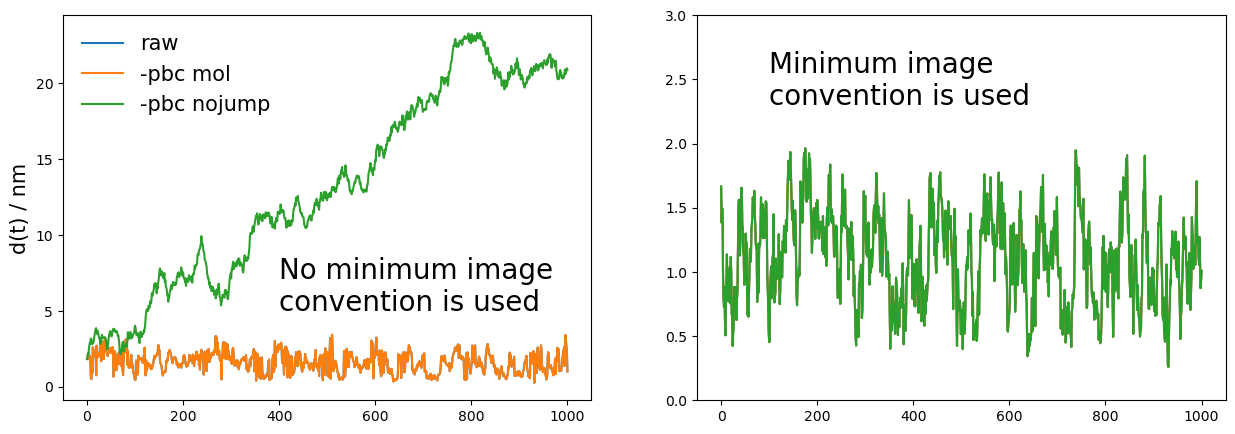

In [175]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(d1_raw, label='raw')
ax[0].plot(d1_mol, label='-pbc mol')
ax[0].plot(d1_nojump, label='-pbc nojump')

ax[1].plot(d2_raw)
ax[1].plot(d2_mol)
ax[1].plot(d2_nojump)

ax[0].set_ylabel('d(t) / nm', fontsize=15)
ax[1].set_ylim(0, 3.0)


ax[0].legend(frameon=False, fontsize=15)
ax[0].text(400, 5 , 'No minimum image \nconvention is used', fontsize=20)
ax[1].text(100, 2.3 , 'Minimum image \nconvention is used', fontsize=20)

In [176]:
#box_vectors = np.eye(3)

In [177]:
#np.eye(3)

In [178]:
#box_vectors[np.diag_indices_from(box_vectors)] = box_lengths

In [179]:
#box_vectors